<a href="https://colab.research.google.com/github/zarin-tasnim-prapti/shestem-assignment.ipynb/blob/main/shestem_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zarin Tasnim
### Email: zarintasnimprapti@gmail.com

## Section A: Data Import & Preprocessing

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload() #file uploading

df = pd.read_csv(next(iter(uploaded))) #read the uploaded CSV

df.head(10) #showing first 10 rows

Saving traffic.csv to traffic (2).csv


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [ ]:
df.isnull().sum() #checking for missing values

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


In [ ]:
print(df.columns)

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime']) #propoer time format

df['Hour'] = df['DateTime'].dt.hour
df['Day_of_Week'] = df['DateTime'].dt.day_name()
df['Weekend'] = df['DateTime'].dt.dayofweek >= 5   #true if Saturday or Sunday

df[['DateTime','Hour','Day_of_Week','Weekend']].head(10)

,DateTime,Hour,Day_of_Week,Weekend
0,2015-11-01 00:00:00,0,Sunday,True
1,2015-11-01 01:00:00,1,Sunday,True
2,2015-11-01 02:00:00,2,Sunday,True
3,2015-11-01 03:00:00,3,Sunday,True
4,2015-11-01 04:00:00,4,Sunday,True
5,2015-11-01 05:00:00,5,Sunday,True
6,2015-11-01 06:00:00,6,Sunday,True
7,2015-11-01 07:00:00,7,Sunday,True
8,2015-11-01 08:00:00,8,Sunday,True
9,2015-11-01 09:00:00,9,Sunday,True


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Vehicles_norm'] = scaler.fit_transform(df[['Vehicles']]) #normalize Vehicles column

df[['Vehicles','Vehicles_norm']].head(10)

,Vehicles,Vehicles_norm
0,15,0.078212
1,13,0.067039
2,10,0.050279
3,7,0.033520
4,9,0.044693
5,6,0.027933
6,9,0.044693
7,8,0.039106
8,11,0.055866
9,12,0.061453


from matplotlib import pyplot as plt
_df_0['Vehicles'].plot(kind='hist', bins=20, title='Vehicles')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Vehicles_norm'].plot(kind='hist', bins=20, title='Vehicles_norm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Vehicles', y='Vehicles_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Vehicles'].plot(kind='line', figsize=(8, 4), title='Vehicles')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Vehicles_norm'].plot(kind='line', figsize=(8, 4), title='Vehicles_norm')
plt.gca().spines[['top', 'right']].set_visible(False)

## Section B: Exploratory Data Analysis

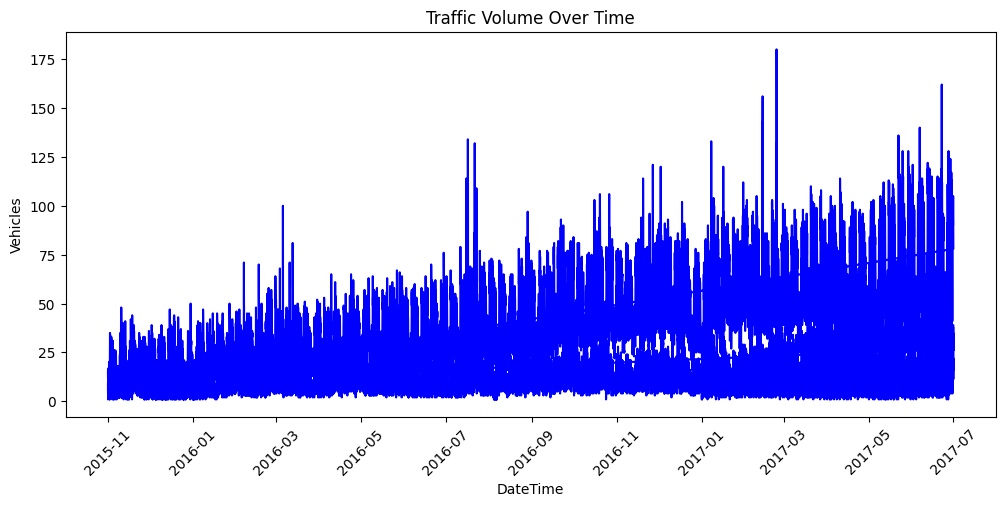

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['DateTime'], df['Vehicles'], color='blue')
plt.title('Traffic Volume Over Time')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.show()

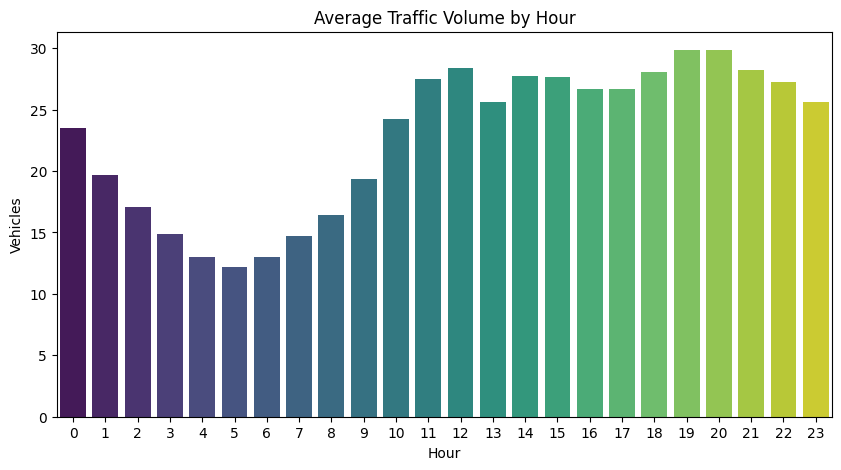

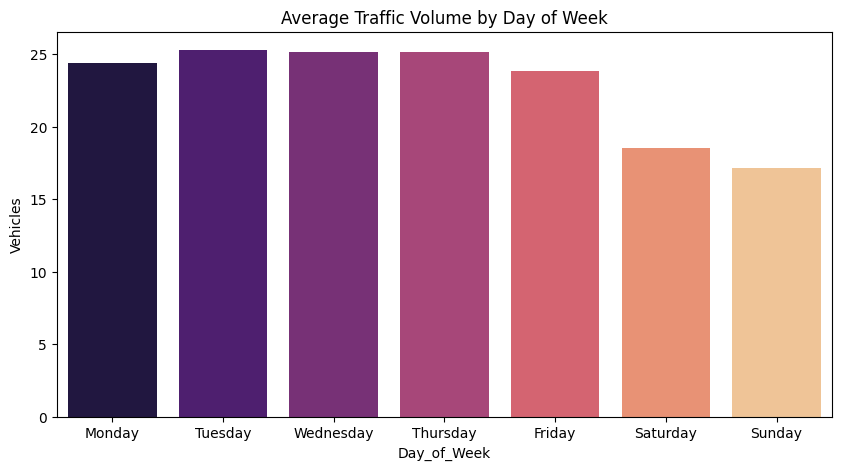

In [ ]:
import warnings
warnings.filterwarnings("ignore")  #ignoreing warnings

import seaborn as sns
import matplotlib.pyplot as plt

#traffic by Hour
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Vehicles', data=df.groupby('Hour')['Vehicles'].mean().reset_index(), palette='viridis')
plt.title('Average Traffic Volume by Hour')
plt.show()

#traffic by Week
plt.figure(figsize=(10,5))
sns.barplot(x='Day_of_Week', y='Vehicles',
            data=df.groupby('Day_of_Week')['Vehicles'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index(),
            palette='magma')
plt.title('Average Traffic Volume by Day of Week')
plt.show()

### 7. Observation

- Traffic is highest during evening (7-8 PM) hours.
- Tuesday, Wednesday, and Thursday have heavier traffic compared to other days.
- Weekends have lower traffic, showing typical workday patterns.
- This shows traffic volume depends on time of day and day of week.

## Section C: Model Building & Evaluation

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload() #file uploading

df = pd.read_csv(next(iter(uploaded))) #read the uploaded CSV


Saving traffic.csv to traffic (1).csv


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
df['Day_of_Week'] = df['DateTime'].dt.day_name()
df['Weekend'] = df['DateTime'].dt.dayofweek >= 5

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_model = pd.get_dummies(df, columns=['Day_of_Week'], drop_first=True) #one-hot encode Day_of_Week

X = df_model[['Hour','Weekend'] + [col for col in df_model.columns if 'Day_of_Week_' in col]] #features and target
y = df_model['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split 80% train, 20% test

print("X_train:", X_train.shape, "X_test:", X_test.shape) #checking shapes
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (38496, 8) X_test: (9624, 8)
y_train: (38496,) y_test: (9624,)


In [ ]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression() #initialize model

lr_model.fit(X_train, y_train) #train on training data

y_pred_lr = lr_model.predict(X_test) #make predictions

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr)) #evaluate
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", round(rmse_lr,2))
print("Linear Regression R²:", round(r2_lr,2))

Linear Regression RMSE: 19.52
Linear Regression R²: 0.07


### Observation
- RMSE = 19.52 → On average, the model’s prediction is off by ~20 vehicles.

- R² = 0.07 → Very low; the Linear Regression model is not capturing the patterns well.

In [ ]:
# Random Forest Regressio

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #initialize model

rf_model.fit(X_train, y_train) #train model

y_pred_rf = rf_model.predict(X_test) #make predictions

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf)) # evaluate
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", round(rmse_rf,2))
print("Random Forest R²:", round(r2_rf,2))

Random Forest RMSE: 19.19
Random Forest R²: 0.1


### 11. Observation:

| Model               | RMSE   | R²    |
|--------------------|--------|-------|
| Linear Regression   | 19.52  | 0.07  |
| Random Forest       | 19.19  | 0.10  | Slightly better, captures non-linear patterns

- Linear Regression is Simple linear model, low fit and Random Forest is Slightly better, captures non-linear patterns

- Random Forest performs a bit better than Linear Regression.

- R² is still low → traffic is highly variable and may depend on other factors (weather, events, etc.) that are not in the dataset.

- Model predictions are better during common rush hours but may still miss unusual spikes.

## Section D: Code Analysis & Interpretation

In [ ]:
X_test_copy = X_test.copy() #predictions to test set
X_test_copy['Predicted_Vehicles'] = y_pred_rf
X_test_copy['Hour'] = X_test_copy['Hour'].astype(int)  #ensure Hour is integer

#group by Hour and get average predicted traffic
top_hours = X_test_copy.groupby('Hour')['Predicted_Vehicles'].mean().sort_values(ascending=False).head(3)
print("Top 3 hours with highest predicted traffic:\n", top_hours)


Top 3 hours with highest predicted traffic:
 Hour
19    29.800104
20    29.360254
12    29.151040
Name: Predicted_Vehicles, dtype: float64


**Top 3 Hours with Highest Predicted Traffic (Random Forest Model):**

| Rank | Hour | Predicted Vehicles |
|------|------|------------------|
| 1    | 19   | 29.80            |
| 2    | 20   | 29.36            |
| 3    | 12   | 29.15            |

Top features contributing to Random Forest predictions:
                Feature  Importance
0                  Hour    0.724038
1               Weekend    0.238943
2    Day_of_Week_Monday    0.011626
6   Day_of_Week_Tuesday    0.005926
5  Day_of_Week_Thursday    0.005919


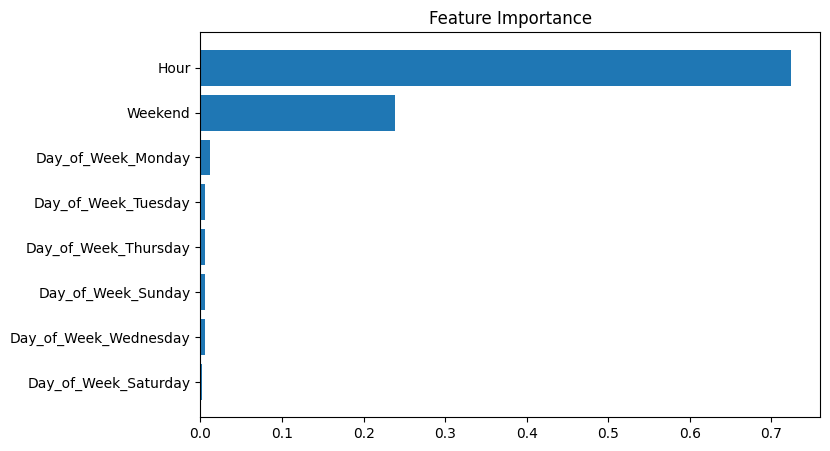

In [ ]:
importances = rf_model.feature_importances_ # get feature importances
feature_names = X_train.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances}) # creating a DataFrame for better display
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

print("Top features contributing to Random Forest predictions:") # show top features
print(feat_imp.head(5))

import matplotlib.pyplot as plt # optional: plot
plt.figure(figsize=(8,5))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()

**Feature Importance (Random Forest Model):**
- **Hour** → Most important feature, captures rush hours.
- **Weekend** → Indicates if traffic is higher on weekdays vs weekends.
- **Day_of_Week** → Individual days have minor contributions.

In [ ]:
#Identify one instance where prediction was off

X_test_copy = X_test.copy() #create a copy of X_test and add actual values
X_test_copy['Predicted_Vehicles'] = y_pred_rf
X_test_copy['Actual_Vehicles'] = y_test.values

X_test_copy['DateTime'] = df.loc[X_test.index, 'DateTime'] #add DateTime from original df

X_test_copy['Error'] = abs(X_test_copy['Actual_Vehicles'] - X_test_copy['Predicted_Vehicles']) # calculate absolute error

max_error_row = X_test_copy.loc[X_test_copy['Error'].idxmax()] #row with max error
print("Instance with highest prediction error:")
print(max_error_row[['DateTime','Hour','Actual_Vehicles','Predicted_Vehicles','Error']])

Instance with highest prediction error:
DateTime              2017-02-23 20:00:00
Hour                                   20
Actual_Vehicles                       173
Predicted_Vehicles               31.75408
Error                           141.24592
Name: 40724, dtype: object


**Prediction Error Example:**
- **DateTime:** 2017-02-23 20:00  
- **Actual Vehicles:** 173  
- **Predicted Vehicles:** 31.75  
- **Error:** 141.25  

**Hypothesis:** The model underestimated traffic because this was likely an unusual event (e.g., festival, accident, or bad weather) not included in the dataset. Random Forest predicts general patterns, but rare spikes are difficult to capture.

## Section E — Reflection & Learning

**What the model learned:**
- Traffic volume strongly depends on the **Hour** of the day, showing clear rush hours in evening (7 - 8 PM).
- **Weekdays**, especially **Tuesday, Wednesday, and Thursday**, have higher traffic than weekends.
- **Weekend** days generally have lower traffic.
- The model captures general traffic patterns but struggles with unusual spikes or events not in the dataset.

**My personal learning:**
- Feature engineering (Hour, Day_of_Week, Weekend) is crucial to help the model understand patterns.
- Linear Regression is too simple for non-linear traffic patterns; Random Forest improves accuracy.
- Traffic prediction is challenging due to unpredictable events; understanding model limitations is important.


## Section F — Real-World Analogy & Critical Thinking

In [ ]:
next_hour_features = {
    'Hour': 8,
    'Day_of_Week': 'Wednesday',
    'Weekend': 0,
    # Weather column is not in our modedata set; so ignoring it
}

#For one-hot encoding Day_of_Week
import pandas as pd

next_hour_df = pd.DataFrame(columns=X_train.columns) # create DataFrame with correct columns
next_hour_df.loc[0, 'Hour'] = next_hour_features['Hour']
next_hour_df.loc[0, 'Weekend'] = next_hour_features['Weekend']

for col in X_train.columns:          # set one-hot encoded day columns
    if 'Day_of_Week_' in col:
        next_hour_df.loc[0, col] = 1 if col == f"Day_of_Week_{next_hour_features['Day_of_Week']}" else 0

predicted_volume = rf_model.predict(next_hour_df) # prediction
print("Predicted traffic for next hour:", predicted_volume[0])

Predicted traffic for next hour: 17.09914178402564


**Predicted Traffic:**
- Predicted traffic for 8 AM Wednesday: ~17 vehicles.

**How this helps city planners:**

The model predicts about 17 vehicles at 8 AM on Wednesday. This helps city planners know when traffic will be busy and plan things like traffic lights or staff. They can prepare in advance instead of reacting to traffic problems later. It can also help manage buses and reduce delays. Using the model makes planning traffic easier and faster.

**Difference between manual observation and model prediction:**

- Charts and averages show general trends, like rush hours or weekday patterns.
- The model predicts **exact traffic volumes for specific hours**, which is more precise and actionable.
- This is valuable because it enables **data-driven decisions** rather than relying only on observed averages.

## Section G — Visualization & Insights.

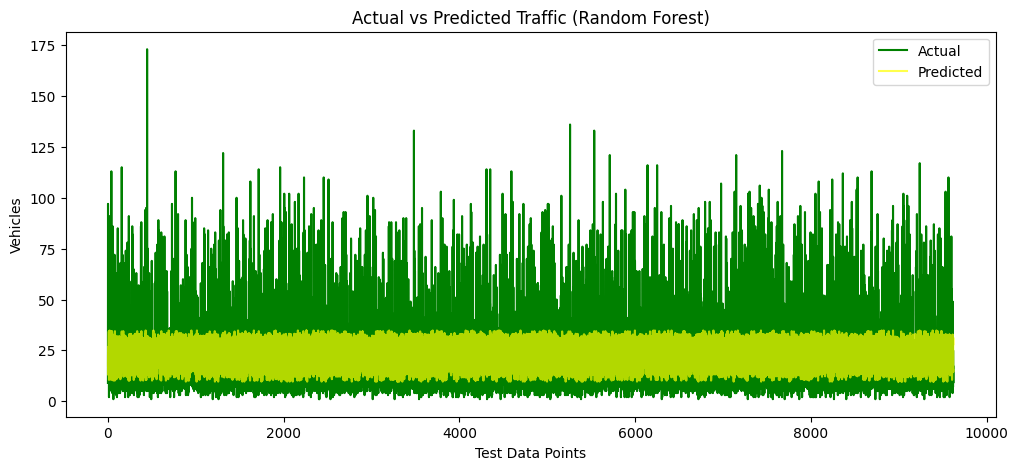

In [ ]:
#Plot Actual vs Predicted traffic for the test set

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual', color='green')
plt.plot(y_pred_rf, label='Predicted', color='yellow', alpha=0.7)
plt.title('Actual vs Predicted Traffic (Random Forest)')
plt.xlabel('Test Data Points')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

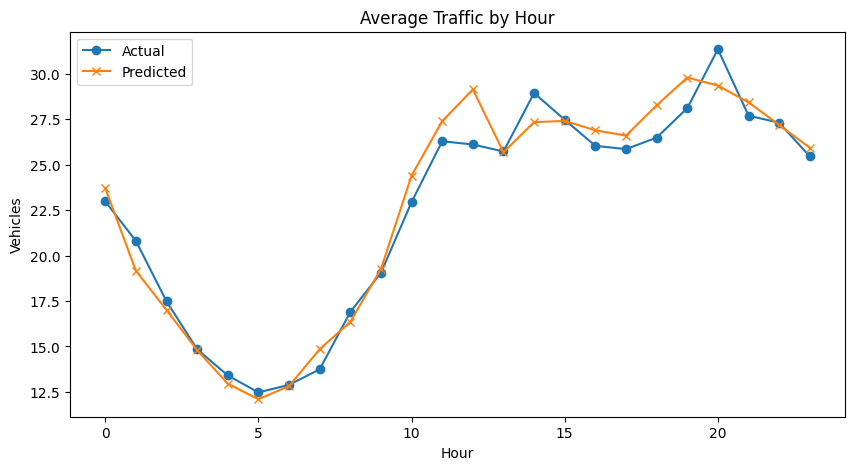

In [ ]:
import pandas as pd

# create DataFrame with actual and predicted
df_plot = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_rf})
df_plot['Hour'] = X_test['Hour'].values

# average by Hour
hourly = df_plot.groupby('Hour').mean()

plt.figure(figsize=(10,5))
plt.plot(hourly.index, hourly['Actual'], label='Actual', marker='o')
plt.plot(hourly.index, hourly['Predicted'], label='Predicted', marker='x')
plt.title('Average Traffic by Hour')
plt.xlabel('Hour')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

In [ ]:
errors = abs(y_test.values - y_pred_rf)  # absolute differences
mean_error = errors.mean()
print("Average error:", mean_error)

Average error: 14.491993442939053


**16. Summarize Key Findings:**
- The model predicts general traffic patterns well, especially during rush hours.
- Traffic is highest in the evening (7–8 PM) and around noon.
- Tuesday, Wednesday, and Thursday have more traffic than other weekdays.
- The model sometimes underestimates unusual spikes, like events or accidents.
- On average, predictions are off by ~14–15 vehicles, but in some unusual cases, the model can be very far off (maximum error ~141 vehicles).
- This prediction can help city planners manage traffic, adjust signals, and plan resources more efficiently.

## Section H — Advanced Challenge (Optional)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload() #file uploading

df = pd.read_csv(next(iter(uploaded))) #read the uploaded CSV


Saving traffic.csv to traffic.csv


In [ ]:
#Sequential Model (GRU or LSTM)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Scale the target (vehicles) for LSTM
scaler = MinMaxScaler()
vehicles_scaled = scaler.fit_transform(df[['Vehicles']])

# 2. Prepare sequences (look back 24 hours)
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(vehicles_scaled)

# 3. Split into train/test
split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

# 4. Build LSTM model
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(X_train_seq.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 5. Train
model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, validation_split=0.1)

# 6. Predict and inverse scale
y_pred_seq = model.predict(X_test_seq)
y_pred_seq = scaler.inverse_transform(y_pred_seq)
y_test_actual = scaler.inverse_transform(y_test_seq)


Epoch 1/5
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 2/5
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 6.5601e-04 - val_loss: 0.0012
Epoch 3/5
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 5.6285e-04 - val_loss: 0.0011
Epoch 4/5
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 5.7948e-04 - val_loss: 0.0011
Epoch 5/5
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 5.6151e-04 - val_loss: 0.0011
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


The LSTM model was trained for 5 epochs. The decreasing loss shows the model is learning traffic patterns, and it was then used to predict traffic on the test set.

In [ ]:
#Calculate RMSE for LSTM

from sklearn.metrics import mean_squared_error
import numpy as np

rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_seq))
print("LSTM RMSE:", rmse_lstm)

LSTM RMSE: 5.093888613033867


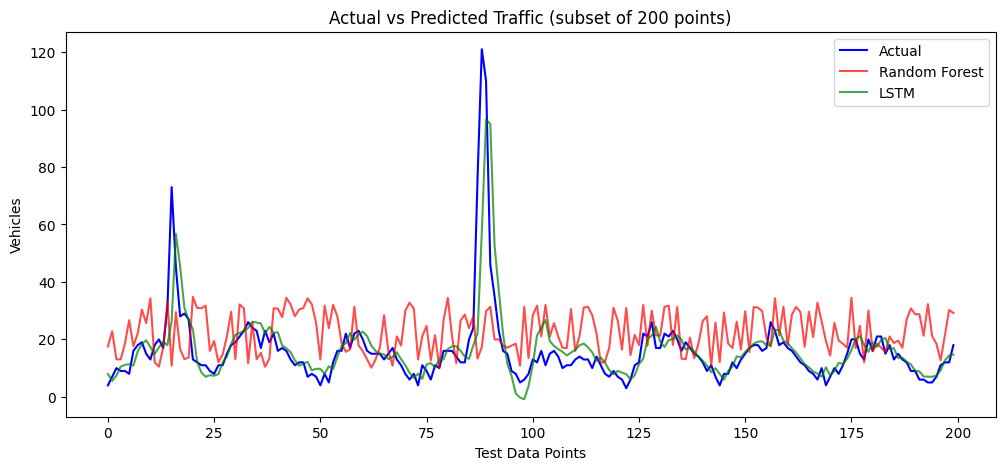

In [ ]:
#Plot Actual vs Predicted (Random Forest vs LSTM)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_actual[:200], label='Actual', color='blue')          # first 200 points
plt.plot(y_pred_rf[:200], label='Random Forest', color='red', alpha=0.7)
plt.plot(y_pred_seq[:200], label='LSTM', color='green', alpha=0.7)
plt.title('Actual vs Predicted Traffic (subset of 200 points)')
plt.xlabel('Test Data Points')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

**Comparison of Models:**

- Random Forest RMSE: ~19 → predicts general traffic patterns but sometimes misses big spikes.  
- LSTM RMSE: ~5 → predicts traffic more accurately and follows trends better.  
- LSTM is better at using past traffic (sequential patterns) to predict the next hour.  
- Both models can help city planners, but LSTM gives more precise predictions for short-term planning.

## Section I: GitHub Repository (Optional)

GitHub Link: https://github.com/zarin-tasnim-prapti/shestem-assignment.ipynb